<a href="https://colab.research.google.com/github/mervegb/diabetes-ml/blob/main/diabetes_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing
- transforming the data
- feature engineering => create new features or modify existing ones to improve model performance
- encoding categorical data
- scaling or normalizing data
- splitting data => dividing dataset into training, validation and testing sets for ml tasks
- handling imbalanced data => addressing class imbalances

In [1]:
#Data Preprocessing
#Step 1: Importing Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Step 2: Load the Data
data = pd.read_csv("https://s3.us-east-2.amazonaws.com/explore.datasets/diabetes/patient_data.csv")

In [2]:
#show the first 5 rows of dataframe
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,time_in_hospital,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,3,NaN,...,No,No,Up,No,No,No,No,No,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,2,NaN,...,No,No,Up,No,No,No,No,No,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,1,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO


In [3]:
#how many rows and columns are in our dataset
data.shape

(101766, 44)

In [4]:
print(f"Columns: {data.columns.tolist()}")

Columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed', 'readmitted']


In [5]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

print(f"There are {len(medications)} medications represented as columns in dataset")

There are 23 medications represented as columns in dataset


In [6]:
#How many hospital admissions and unique patients are in the dataset
n_admissions = data["encounter_id"].nunique()
n_patients = data['patient_nbr'].nunique()
print(f"Number of admissions: {n_admissions}")
print(f"Number of patients: {n_patients}")

Number of admissions: 101766
Number of patients: 71518


In [7]:
#How many patients have had more than one hospital admission

#value_counts() => pandas function that counts the occurrences of each unique value
#it counts how many times each patient_nbr appears in the patient_nbr column

#reset_index() => After using value_counts(), result is a Series, by applying reset_index() we convert this Series into a DataFrame with default integer index

admissions_per_patient = data["patient_nbr"].value_counts().reset_index()
admissions_per_patient.columns = ["patient_nbr", "count"]
multiple_admissions = admissions_per_patient[admissions_per_patient['count'] > 1]

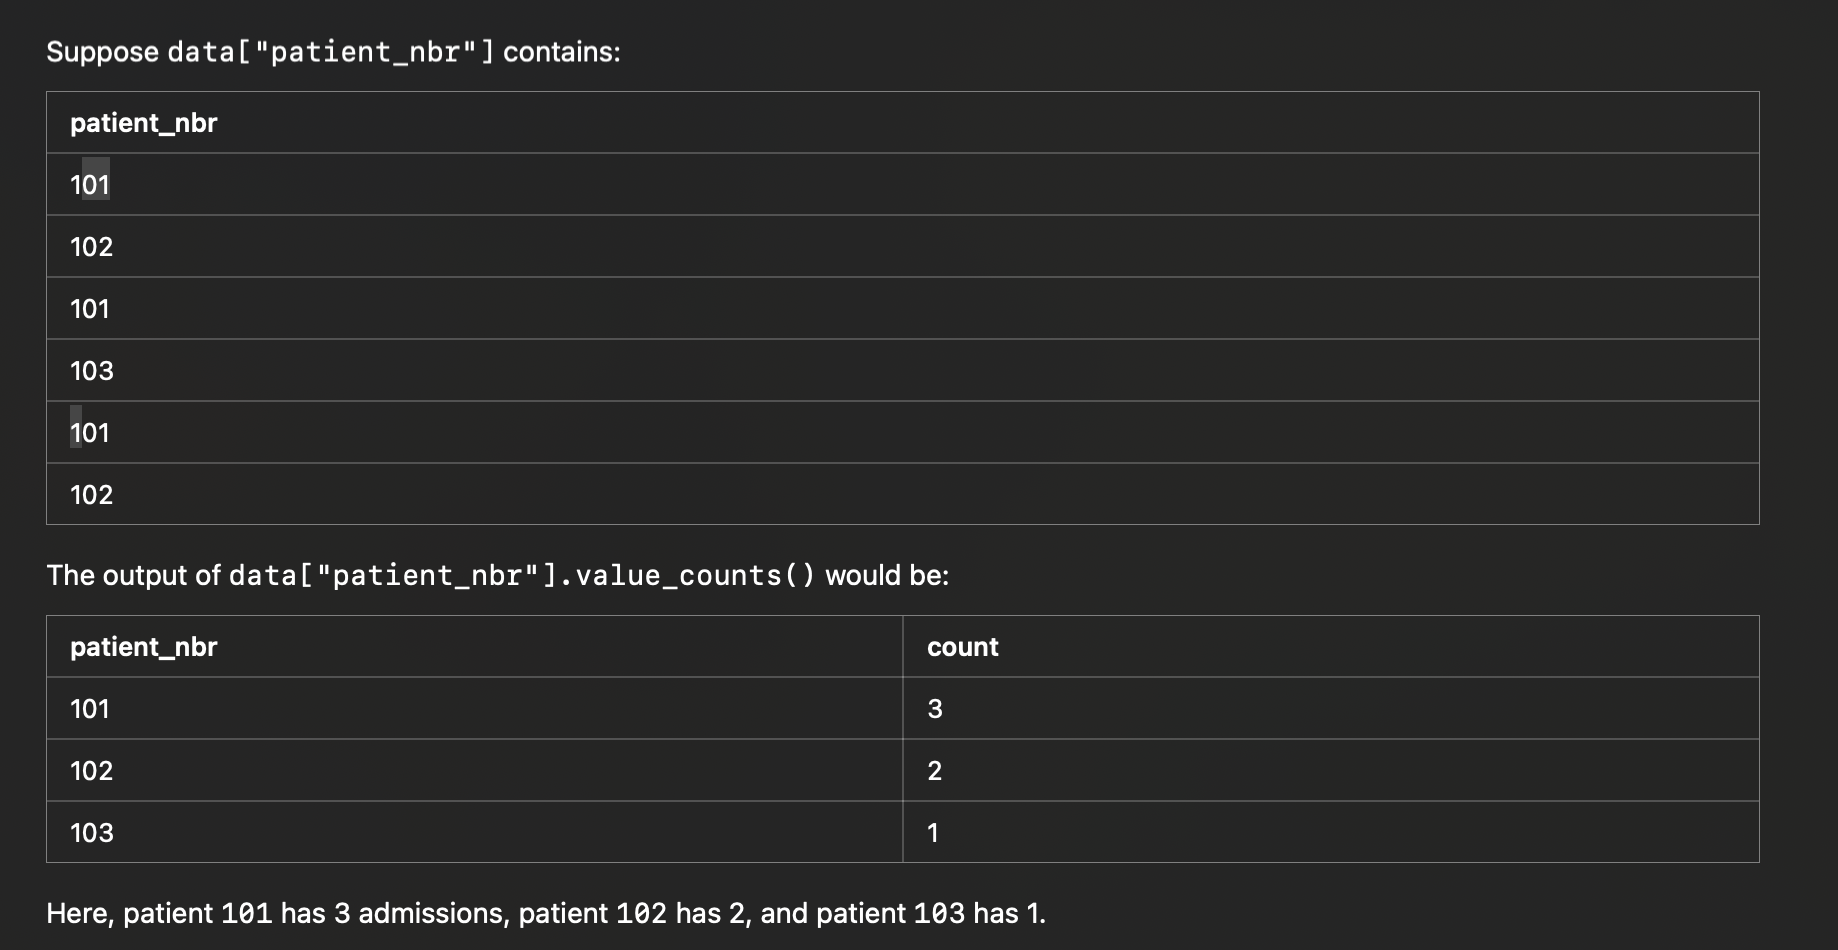

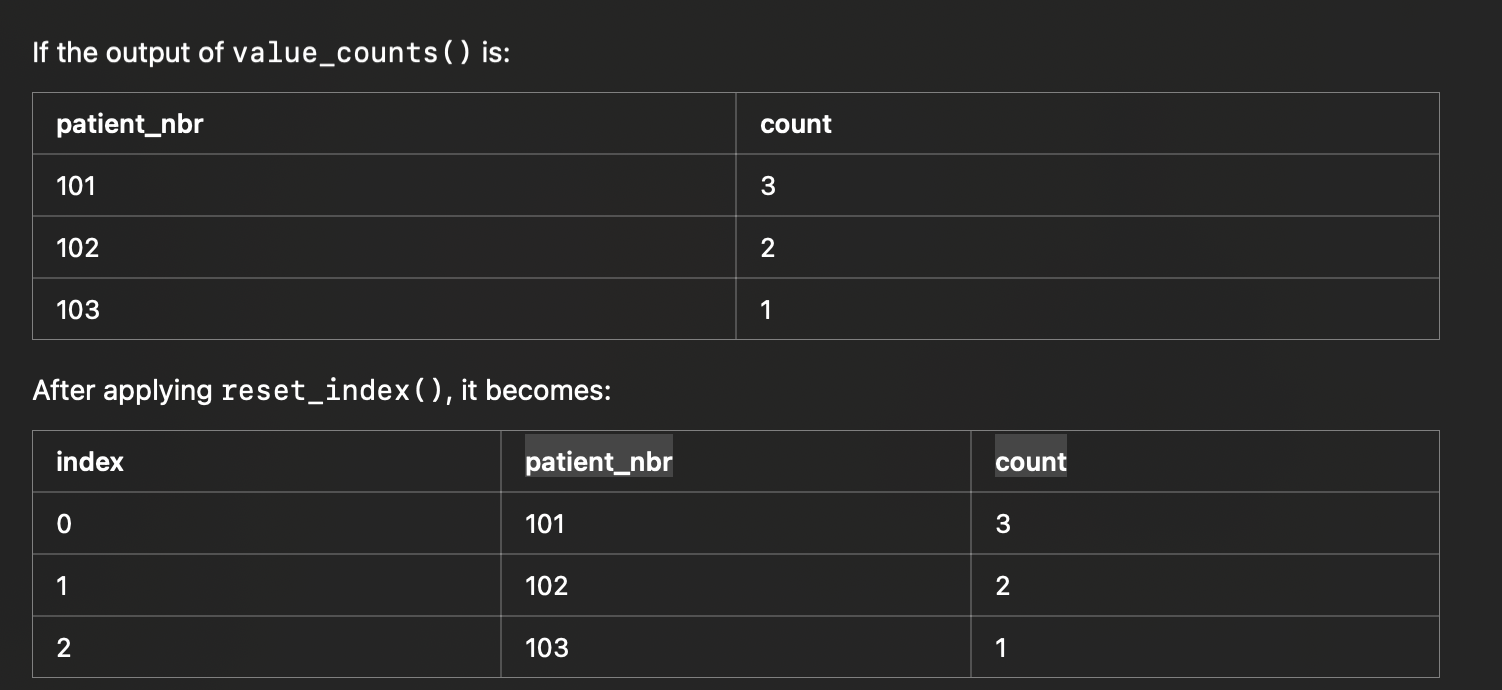

In [8]:
print(f"Proportion of patients that have multiple admissions: {multiple_admissions['patient_nbr'].nunique()/n_patients:.2%}")
print(f"Maximum number of admissions for a given patient: {multiple_admissions['count'].max()}")

#23.45% of the patients have had more than 1 hospital admission
#Maximum number of hospital admissions for a given patient is 40

Proportion of patients that have multiple admissions: 23.45%
Maximum number of admissions for a given patient: 40


#Step 3: Data Cleaning
Goals of Data Cleaning
- fixing incorrect or inconsistent data
- handling missing data
- removing duplicates
- correcting data types
- handling outliers
- addressing irrelevant data

In [9]:
admission_type = pd.read_csv("https://s3.us-east-2.amazonaws.com/explore.datasets/diabetes/id_mappers/admission_type_id.csv")
admission_type

#NaN, Not Mapped, Not Available these represent missing data, we can use pandas replace method to collapse into one category that represents a missing value

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [10]:
missing_values = ["nan", "Not Available", "Not Mapped"]
admission_type["description"] = admission_type["description"].replace(missing_values, np.nan)

In [11]:
admission_type.columns = ["admission_type_id", "admission_type"]

In [12]:
data = data.merge(admission_type, on="admission_type_id")

In [13]:
data["admission_type"].value_counts()

,count
admission_type,
Emergency,53990
Elective,18869
Urgent,18480
Trauma Center,21
Newborn,10


<ipython-input-14-8195b5807f1d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="admission_type", data=data, palette="magma")


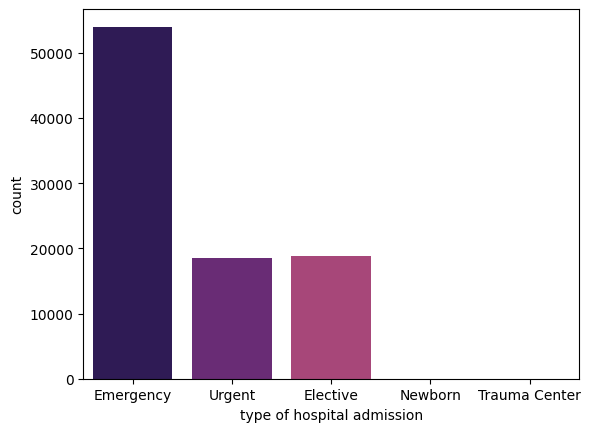

In [14]:
sns.countplot(x="admission_type", data=data, palette="magma")
plt.xlabel("type of hospital admission")
plt.show()

In [15]:
discharge_disposition = pd.read_csv("https://s3.us-east-2.amazonaws.com/explore.datasets/diabetes/id_mappers/discharge_disposition_id.csv")
discharge_disposition.sample(n=5, random_state=416)

,discharge_disposition_id,description
13,14,Hospice / medical facility
8,9,Admitted as an inpatient to this hospital
14,15,Discharged/transferred within this institution...
20,21,"Expired, place unknown. Medicaid only, hospice."
29,29,Discharged/transferred to a Critical Access Ho...


In [16]:
#we only want to predict the hospital admission for living patients so we need to remove hospital admissions in which the patient was recorded as "expired"
discharge_disposition["expired"] = discharge_disposition["description"].str.lower().str.contains("expired")

In [17]:
discharge_expired = discharge_disposition[discharge_disposition["expired"] == True]
discharge_expired

,discharge_disposition_id,description,expired
10,11,Expired,True
18,19,"Expired at home. Medicaid only, hospice.",True
19,20,"Expired in a medical facility. Medicaid only, ...",True
20,21,"Expired, place unknown. Medicaid only, hospice.",True


In [18]:
expired_ids = discharge_expired["discharge_disposition_id"].tolist()
print(f"Expired IDs: {expired_ids}")

Expired IDs: [11, 19, 20, 21]


In [19]:
#remove all rows from the dataset that has discharge_disposition_id equal to one the values in our expired_ids list
data = data[~data["discharge_disposition_id"].isin(expired_ids)]

In [20]:
#after removing expired patients, how many patients do we have in our dataset
n_patients_nonexpired = data["patient_nbr"].nunique()
print(f"Original number of patients: {n_patients}")
print(f"Number of expired patients removed: {n_patients - n_patients_nonexpired}")
print(f"Number of patients remaining in the dataset: {n_patients_nonexpired}")

Original number of patients: 71518
Number of expired patients removed: 1079
Number of patients remaining in the dataset: 70439


In [21]:
#Converting medication features from categorical to boolean
data[medications[0]].value_counts()

# we'll update the column to "0" (not taking the medication) to "1" (taking the medication). We're losing out on information regarding their dose change, but it's a compromise we're willing to make in order to simplify our dataset.

,count
metformin,
No,80216
Steady,18256
Up,1067
Down,575


In [22]:
#use numpy.where to convert all instances of No to 0 and everything else to 1

for m in medications:
    data[f'{m}_bool'] = np.where(data[m]=='No', 0, 1)
    data = data.drop(columns=m)

In [23]:
#proportion of patients who have been administered a particular medication across all their hospital admissions
#how commonly each medication is prescribed to patients in the dataset

prevalence = []

for m in medications:
  patient_meds = data.groupby("patient_nbr")[f'{m}_bool'].sum().reset_index() #for each patient we get a count of how many admissions involved this medication
  n_patients_on_med = patient_meds[f'{m}_bool'].sum() #how many patients were on this medication
  proportion = n_patients_on_med/n_patients
  prevalence.append(proportion)

#prevalence is needed to determine which medications are most prevalent in our dataset

In [24]:
medication_counts =pd.DataFrame({"medication": medications, "prevalence":prevalence})
medication_counts = medication_counts.sort_values("prevalence", ascending=False)
medication_counts.head()

,medication,prevalence
17,insulin,0.747141
0,metformin,0.278224
6,glipizide,0.176249
7,glyburide,0.147753
9,pioglitazone,0.101807


<ipython-input-25-8373aeb12b75>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="medication", y="prevalence", data=medication_counts.head(10),palette='viridis')


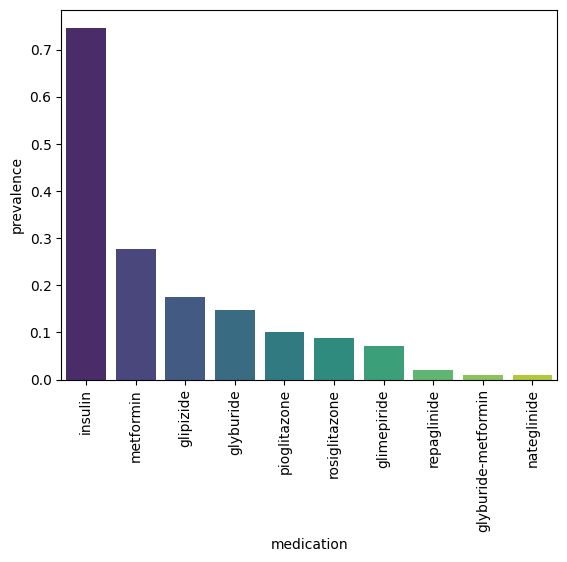

In [25]:
#visualize top 10 most prevalent medications
sns.barplot(x="medication", y="prevalence", data=medication_counts.head(10),palette='viridis')
plt.xticks(rotation=90)
plt.show()

#we can see that insulin is the most prevalent medication followed by metformin

In [26]:
#get_mesh_from_drug_name: returns relevant MeSH term for a given drug name
import json
import requests

def get_mesh_from_drug_name(drug_name):
    drug_name = drug_name.strip()
    rxclass_list = []
    try:
        r = requests.get(f"https://rxnav.nlm.nih.gov/REST/rxclass/class/byDrugName.json?drugName={drug_name}&relaSource=MESH")
        response = r.json()
        all_concepts = response['rxclassDrugInfoList']['rxclassDrugInfo']
        for i in all_concepts:
            rxclass_list.append(i['rxclassMinConceptItem']['className'])
    except:
        pass
    return list(set(rxclass_list))


In [27]:
top_ten_meds = medication_counts.head(10)["medication"].tolist()
med_mesh_descriptors = dict()
for m in top_ten_meds:
  med_mesh_descriptors[m] = get_mesh_from_drug_name(m)

In [28]:
med_mesh_descriptors

{'insulin': [],
 'metformin': [],
 'glipizide': [],
 'glyburide': [],
 'pioglitazone': [],
 'rosiglitazone': [],
 'glimepiride': [],
 'repaglinide': [],
 'glyburide-metformin': [],
 'nateglinide': []}

In [29]:
#goal of our model will be to predict whether a patient will readmitted to the hospital
data["readmitted"].value_counts()

,count
readmitted,
NO,53212
>30,35545
<30,11357


In [30]:
#to keep things simple we'll view this as binary classification problem: did the patient get readmitted
data["readmitted_bool"] = np.where(data["readmitted"] == "NO", 0,1)
data["readmitted_bool"].value_counts()


,count
readmitted_bool,
0,53212
1,46902


<Axes: >

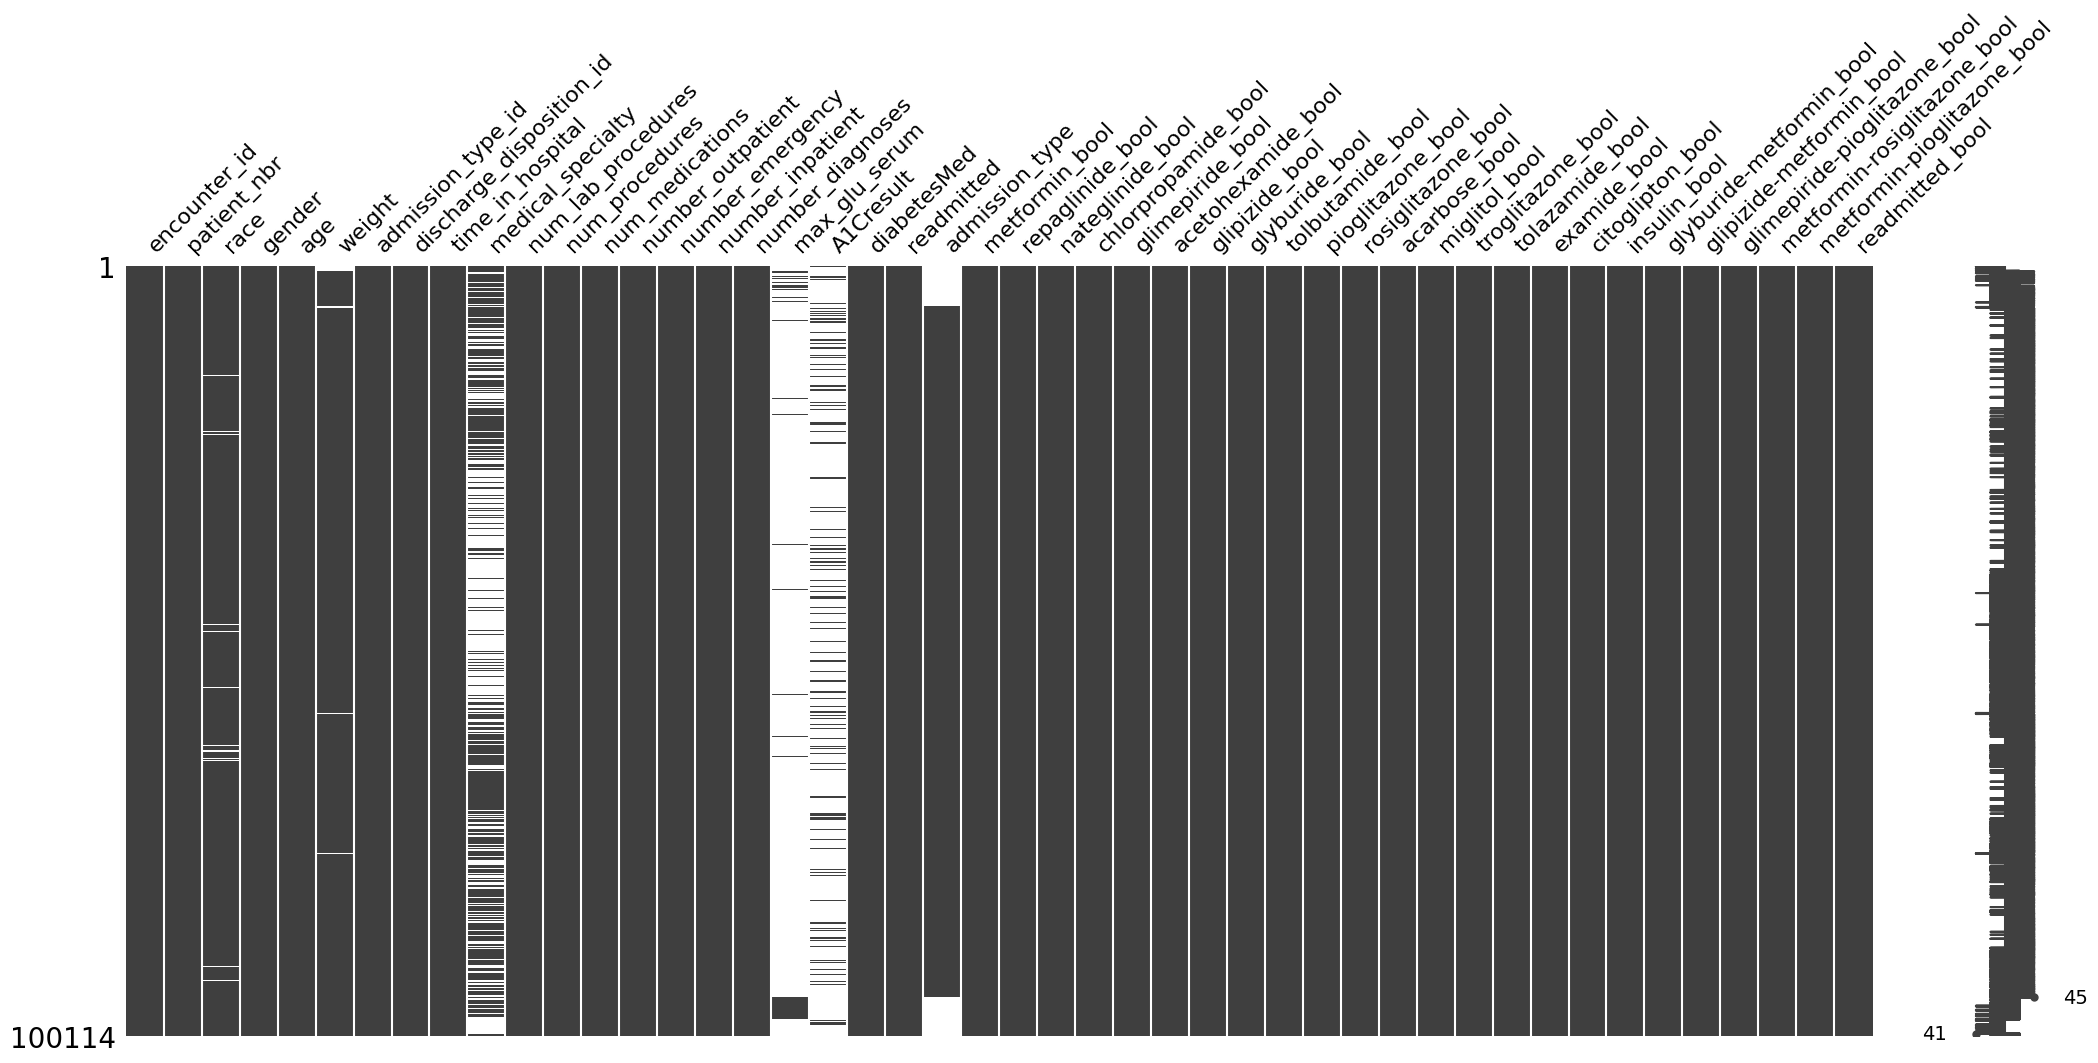

In [31]:
#Data Exploration and Visualization
#Assessing missing values
import missingno as msno

msno.matrix(data)

<ipython-input-32-2bb9d2d386f4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="age", data=data, palette="viridis")
<ipython-input-32-2bb9d2d386f4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="gender", data=data, palette="viridis")


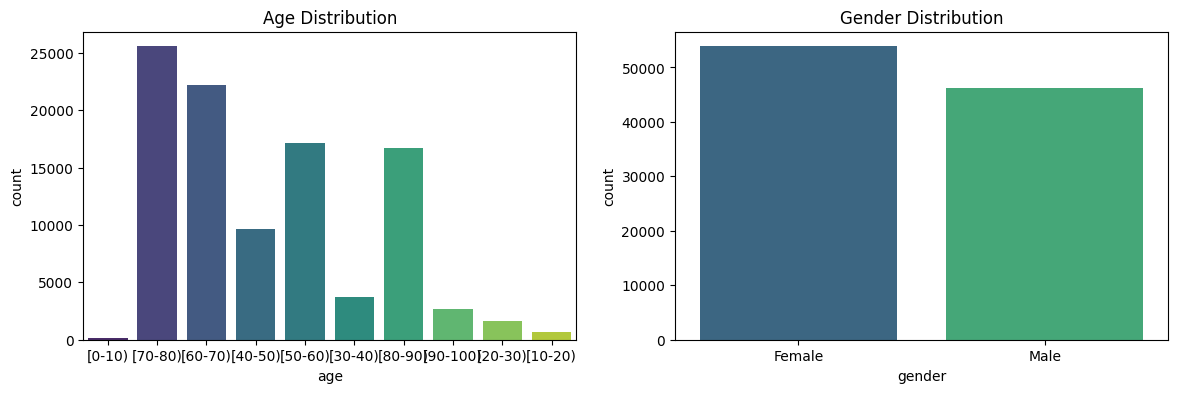

In [32]:
#Patient Demographics: Age and Gender
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x="age", data=data, palette="viridis")
plt.title("Age Distribution")

plt.subplot(1,2,2)
sns.countplot(x="gender", data=data, palette="viridis")
plt.title("Gender Distribution")
plt.show()

In [33]:
data["gender"].value_counts(normalize=True)

#Age distribution plot shows that our dataset represents an aging population
#Most common age is 70-80 years
#Most common gender is female

,proportion
gender,
Female,0.538013
Male,0.461987


In [41]:
#How long were the hospital stays for given admission
print(f"Mean time in hospital: {data['time_in_hospital'].mean():.2f}")

#Patients stayed on average 4.4 days in hospital

Mean time in hospital: 4.39


<ipython-input-42-7f8d2bf1f3f1>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['num_medications'], shade=True, legend=False)
<ipython-input-42-7f8d2bf1f3f1>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['num_lab_procedures'], shade=True, legend=False)


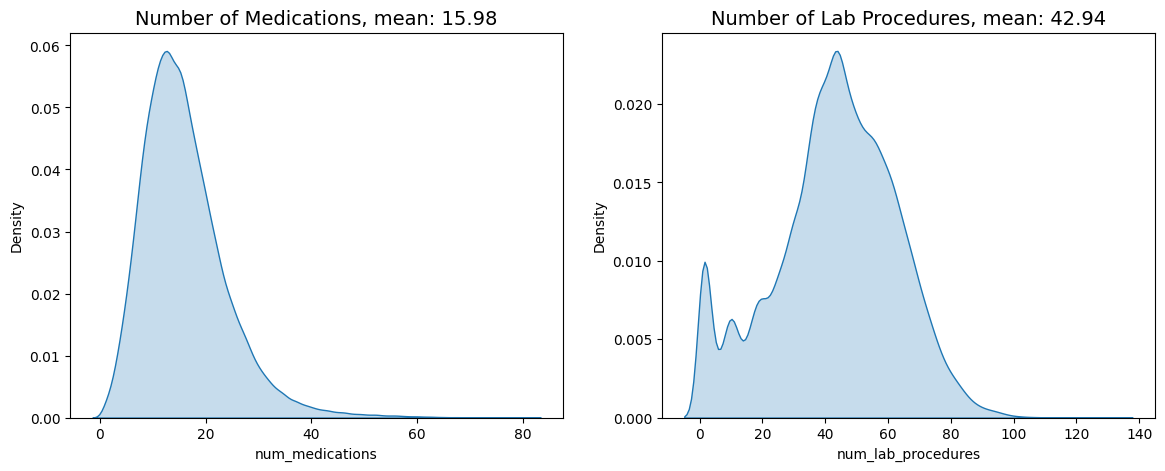

In [42]:
#Number of diagnoses, procedures, medications
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.kdeplot(data['num_medications'], shade=True, legend=False)
plt.title(f"Number of Medications, mean: {data['num_medications'].mean():.2f}", size=14)

plt.subplot(1,2,2)
sns.kdeplot(data['num_lab_procedures'], shade=True, legend=False)
plt.title(f"Number of Lab Procedures, mean: {data['num_lab_procedures'].mean():.2f}", size=14)
plt.show()


#Patients on average were administered 16 medications during their hospital stay
#Average number of lab procedures was 43

In [43]:
#most common medical specialty
medical_specialties = data["medical_specialty"].value_counts().reset_index()
medical_specialties.columns = ["specialty", "count"]
medical_specialties["prevalence"] = medical_specialties["count"] / len(data)
print(f"There are {data['medical_specialty'].nunique()} medical specialties.")
medical_specialties.head()

There are 72 medical specialties.


,specialty,count,prevalence
0,InternalMedicine,14328,0.143117
1,Emergency/Trauma,7449,0.074405
2,Family/GeneralPractice,7302,0.072937
3,Cardiology,5296,0.052900
4,Surgery-General,3068,0.030645
